# Fractal appears from random walk

Select 3 points in a plane at random to form a triangle. Also select a r andom one more point as a starting point of a random walk. Define random walk as follows: in each step select at random the triangle vertex, and move halfway to that vertex from the current position. What is interesting, in spite of purely random nature of the whole process, the points appearing in the random walk form a well structured set, looking as a fractal.

In this notebook we illustrate the walk with actual running.

In [1]:
# import some tools
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


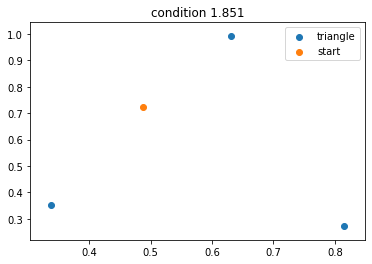

In [2]:
# obtain a triangle and a point
cnd = 5

# select a triangle with low condition value, for better visibility
while cnd >= 2:
    tri = np.random.uniform(size=(3, 2))
    poi = np.random.uniform(size=(2,))
    # check collinearity
    z = tri[1:, :] - tri[0, :]
    cnd = np.linalg.cond(z)
# plot the triangle and the starting point
scatter(tri[:, 0], tri[:, 1], label='triangle');
scatter(poi[0], poi[1], label='start');
title('condition {0:.3f}'.format(cnd));
legend();

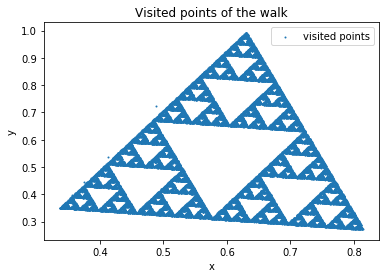

In [3]:
# distance portion to move
lam = 0.5

# number of moves
n_moves = 30000

# vertex numbers
vrt= (3 * np.random.uniform(size=(n_moves,))).astype('int')

# points sequence, main walk loop
points = np.zeros((n_moves, 2))
points[0, :] = poi
for i in range(1, n_moves):
    points[i, :] = lam * tri[vrt[i], :] + (1 - lam) * points[i - 1, :]

# index
ind = np.arange(n_moves)

# create a dataframe from point coordinates
dfp = pd.DataFrame(points, index=ind, columns=['x', 'y'])

# join points coordinates to the dataframe
df = pd.DataFrame(vrt, index=ind, columns=['vertex'])
df = df.join(dfp)

# finally plot the points of the walk
df.plot.scatter('x', 'y', s=1, label='visited points');
title('Visited points of the walk');
legend();